In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn

import itertools
import warnings
warnings.filterwarnings('ignore')

np.set_printoptions(precision=2)
%matplotlib inline

-----

## MLPClassifier

In [2]:
from sklearn.datasets import load_digits

digits = load_digits()
X_digits, Y_digits = digits.data, digits.target
print('Dataset Sizes : ', X_digits.shape, Y_digits.shape)

Dataset Sizes :  (1797, 64) (1797,)


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_digits, Y_digits, train_size=0.80, test_size=0.20, stratify=Y_digits, random_state=123)
print('Train/Test Sizes : ', X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

Train/Test Sizes :  (1437, 64) (360, 64) (1437,) (360,)


In [4]:
from sklearn.neural_network import MLPClassifier

mlp_classifier  = MLPClassifier(random_state=123)
mlp_classifier.fit(X_train, Y_train)

MLPClassifier(random_state=123)

In [5]:
Y_preds = mlp_classifier.predict(X_test)

print(Y_preds[:15])
print(Y_test[:15])

print('Test Accuracy : %.3f'%mlp_classifier.score(X_test, Y_test)) ## Score method also evaluates accuracy for classification models.
print('Training Accuracy : %.3f'%mlp_classifier.score(X_train, Y_train))

[5 9 9 6 1 6 6 9 8 7 4 2 1 4 3]
[5 9 9 6 1 6 6 9 8 7 4 2 1 4 3]
Test Accuracy : 0.983
Training Accuracy : 1.000


In [6]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(Y_test, Y_preds):
    conf_mat = confusion_matrix(Y_test, Y_preds)
    print(conf_mat)
    fig = plt.figure(figsize=(6,6))
    plt.matshow(conf_mat, cmap=plt.cm.Blues, fignum=1)
    plt.yticks(range(10), range(10))
    plt.xticks(range(10), range(10))
    plt.colorbar();
    for i in range(10):
        for j in range(10):
            plt.text(i-0.2,j+0.1, str(conf_mat[j, i]), color='tab:red')

[[36  0  0  0  0  0  0  0  0  0]
 [ 0 36  0  0  0  0  0  0  0  0]
 [ 0  1 33  0  0  0  0  1  0  0]
 [ 0  0  0 37  0  0  0  0  0  0]
 [ 0  0  0  0 36  0  0  0  0  0]
 [ 0  0  0  0  1 36  0  0  0  0]
 [ 0  0  0  0  0  0 36  0  0  0]
 [ 0  0  0  0  0  0  0 35  0  1]
 [ 0  2  0  0  0  0  0  0 33  0]
 [ 0  0  0  0  0  0  0  0  0 36]]


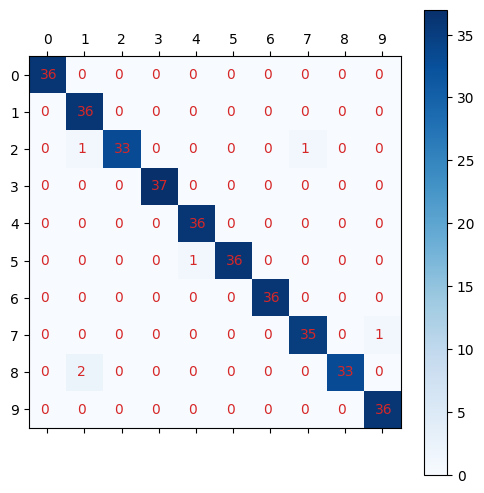

In [7]:
plot_confusion_matrix(Y_test, mlp_classifier.predict(X_test))

### Important Attributes of MLPClassifier

Below is a list of important attributes available with an MLPClassifier which can provide meaningful insights once the model is trained.

    loss_ - Loss after the training process has completed.
    coefs_ - An array of length n_layers-1 where each element represents weights associated with layer i.
    intercepts_ - An array of length n_layers-1 where each element represents intercept associated with layer i's perceptrons.
    n_iter_ - The number of iterations for which estimator ran.
    out_activation_ - Name of output layer activation function.



In [8]:
print("Loss : ", mlp_classifier.loss_)

Loss :  0.0034728684994180608


In [9]:
print("Number of Coefs : ", len(mlp_classifier.coefs_))

[weights.shape for weights in mlp_classifier.coefs_]

Number of Coefs :  2


[(64, 100), (100, 10)]

In [10]:
print("Number of Intercepts : ", len(mlp_classifier.intercepts_))

[intercept.shape for intercept in mlp_classifier.intercepts_]

Number of Intercepts :  2


[(100,), (10,)]

In [11]:
print("Number of Iterations for Which Estimator Ran : ", mlp_classifier.n_iter_)

Number of Iterations for Which Estimator Ran :  125


In [12]:
print("Name of Output Layer Activation Function : ", mlp_classifier.out_activation_)

Name of Output Layer Activation Function :  softmax


### GridSearchCV

It's a wrapper class provided by sklearn which loops through all parameters provided as params_grid parameter with a number of cross-validation folds provided as cv parameter, evaluates model performance on all combinations and stores all results in cv_results_ attribute. It also stores model which performs best in all cross-validation folds in best_estimator_ attribute and best score in best_score_ attribute.

In [25]:
from sklearn.model_selection import GridSearchCV
'''
params = {'activation': ['relu', 'tanh', 'logistic', 'identity'],
          'hidden_layer_sizes': [(100,), (50,100,), (50,75,100,)],
          'solver': ['adam', 'sgd', 'lbfgs'],
          'learning_rate' : ['constant', 'adaptive', 'invscaling']
         }
'''
params = {'activation': ['relu', 'tanh'],
          'hidden_layer_sizes': [(100,), (50,100,), (50,75,100,)],
          'solver': ['adam', 'sgd'],
          'learning_rate' : ['constant']
         }

mlp_classif_grid = GridSearchCV(MLPClassifier(random_state=123), param_grid=params, n_jobs=-1, cv=2, verbose=5)
mlp_classif_grid.fit(X_train,Y_train)

print('Train Accuracy : %.3f'%mlp_classif_grid.best_estimator_.score(X_train, Y_train))
print('Test Accuracy : %.3f'%mlp_classif_grid.best_estimator_.score(X_test, Y_test))
print('Best Accuracy Through Grid Search : %.3f'%mlp_classif_grid.best_score_)
print('Best Parameters : ',mlp_classif_grid.best_params_)

Fitting 2 folds for each of 12 candidates, totalling 24 fits


ValueError: 
All the 24 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py", line 749, in fit
    return self._fit(X, y, incremental=False)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py", line 437, in _fit
    X, y = self._validate_input(X, y, incremental, reset=first_pass)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py", line 1120, in _validate_input
    self._label_binarizer.fit(y)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py", line 311, in fit
    self.classes_ = unique_labels(y)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/multiclass.py", line 107, in unique_labels
    raise ValueError("Unknown label type: %s" % repr(ys))
ValueError: Unknown label type: (array([10.5, 18.8, 27.5, 19.5, 22. ,  5. , 21.7, 50. , 35.4, 32. , 20.5,
       16.8, 22.9,  8.5, 50. , 22.2, 15.2, 22.6,  7. , 19.3, 26.4, 12.8,
       19.2, 19.7, 38.7, 30.3, 25. , 23.7, 11.7, 17.5,  5.6, 25. , 14.9,
       22.3, 20.5, 50. , 24.8, 20.7, 23.2, 19.7, 19.4, 29.8, 34.9, 11. ,
       12.5, 23.5, 24.4, 16.5, 20.8, 23.3, 24.4, 19.3, 19.6, 21. , 14.4,
       23.6, 21.4, 28.2, 24.8, 18.5, 21.9, 23.1, 18.7, 26.6, 25. , 44. ,
       22. , 27.1, 16.2,  8.4, 20. , 22.5, 19.4, 25. , 18.4, 23.1, 33.1,
       31.1, 19.5, 21.2, 20.6, 19.8, 21.9, 21.7, 14.8, 14. , 34.6, 13.3,
       18.2, 22.2, 22.8, 48.8, 27.5, 23.7, 30.1, 13.1, 11.9, 18.2, 19.3,
       15.4, 17.8, 22. , 33.4, 16.5, 24.7, 36.1, 48.3, 13.8, 20.5, 21.6,
       20.2, 43.5, 13.3, 19.4, 13.9, 32.5, 21.7, 50. , 24.7, 14.3, 22.6,
       17.6, 20.9, 21.1, 15.1, 12. , 17. , 50. , 11.9, 24.2, 20. , 24.3,
       23. , 17.8, 25.2, 15.6, 22.6, 29.1, 12.7, 23.8,  8.8, 17.1, 33. ,
       24.6, 18.3,  7.4, 23.8, 20. , 28.5, 17.2, 22.9, 20.4, 28.1, 30.1,
       22.7, 39.8, 24.5, 10.4, 33.2, 19.9, 18.1, 23.2, 11.8,  7. , 23.9,
       23.9, 30.8, 18.7, 34.7, 15.2, 22.1, 28.4, 17.4, 24.4, 20.1, 16.7,
       42.8, 20.7, 19. , 27.5, 22.8, 44.8, 14.5, 13.2, 23.4, 16.6, 15.7,
       18.7, 21.4, 50. , 23.7, 31.6, 17.3, 19.5, 22.9, 17.5, 24.3, 43.8,
       16.7, 20.4, 11.3, 27.5]),)

--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py", line 749, in fit
    return self._fit(X, y, incremental=False)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py", line 437, in _fit
    X, y = self._validate_input(X, y, incremental, reset=first_pass)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py", line 1120, in _validate_input
    self._label_binarizer.fit(y)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py", line 311, in fit
    self.classes_ = unique_labels(y)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/multiclass.py", line 107, in unique_labels
    raise ValueError("Unknown label type: %s" % repr(ys))
ValueError: Unknown label type: (array([48.5, 17.1, 23.1, 28.4, 18.9, 13. , 17.2, 24.1, 18.5, 21.8, 13.3,
       23. , 14.1, 23.9, 24. , 17.2, 21.5, 19.1, 20.8, 36. , 20.1,  8.7,
       13.6, 22. , 22.2, 21.1, 13.4, 17.4, 20.1, 10.2, 23.1, 10.2, 13.1,
       14.3, 14.5,  7.2, 19.6, 20.6, 22.7, 26.4,  7.5, 20.3, 50. ,  8.5,
       20.3, 16.1, 22. , 19.6, 10.2, 23.2, 35.2, 25. , 36.2, 16.1, 10.9,
       36.4, 25. , 20.1, 16.8, 23.7, 42.3, 17.9, 12.7, 50. , 18.4, 33.4,
       22.9, 14.6, 29.9, 22.6, 22.5, 29. , 50. , 37.9, 21.4, 29.4, 20.3,
       23. , 30.1, 21.7, 36.5, 25. , 24.5, 37.3, 33.8, 24.7, 32.7, 23.1,
       25.1, 21.7, 13.4, 24.8, 12.7, 11.8,  8.3, 20.2, 41.3, 23.2, 23.1,
       24.3, 19.3, 10.8, 18.6, 29. , 23.9, 19.5, 13.1, 31.7, 21. , 18.2,
       21. , 21.2, 14.1, 33.2, 13.8, 19.9, 21.7, 20.6, 21.2, 13.6, 18.9,
       18. , 24.1, 28.7, 23.4, 15.2, 23.6, 13.8, 11.7, 16.3, 50. , 13.5,
       50. , 31.5, 22.6, 12.1, 21.7, 14.1, 22.4, 13.4, 33.1, 20.6,  8.3,
       36.2,  6.3, 21.5, 23.3, 24. , 19.1, 29.6, 27.9, 16.2,  9.5, 24.6,
       15.6,  8.1, 15.3, 19. , 22. , 28. , 19.2, 14.5,  9.7, 30.7, 20.6,
       16. , 19.8, 17.8, 21.2, 28.7, 41.7,  7.2, 13.4, 17.7, 26.7, 23.8,
       21.8, 27.1, 18.3,  5. , 10.4, 18.5, 17.4, 28.6, 50. , 14.2, 31.2,
        8.4, 23. , 35.1, 23.9, 20.3, 46.7, 15. , 18.4, 17.8, 22.5, 18.8,
       20.9, 50. , 29.1, 17.1]),)


[[36  0  0  0  0  0  0  0  0  0]
 [ 0 36  0  0  0  0  0  0  0  0]
 [ 0  1 33  0  0  0  0  1  0  0]
 [ 0  0  0 37  0  0  0  0  0  0]
 [ 0  0  0  0 36  0  0  0  0  0]
 [ 0  0  0  0  1 36  0  0  0  0]
 [ 0  0  0  0  0  0 36  0  0  0]
 [ 0  0  0  0  0  0  0 35  0  1]
 [ 0  2  0  0  0  0  0  0 33  0]
 [ 0  0  0  0  0  0  0  0  0 36]]


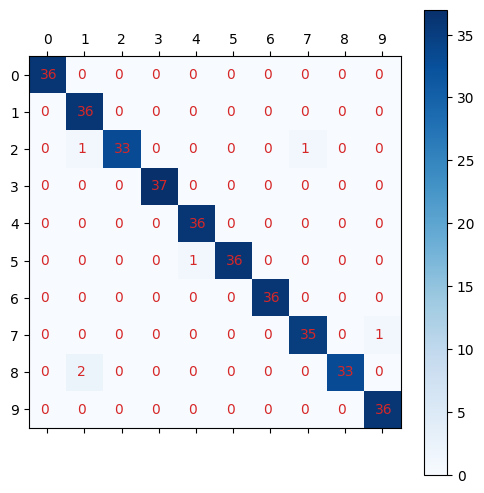

In [14]:
plot_confusion_matrix(Y_test, mlp_classif_grid.best_estimator_.predict(X_test))

--------

## MLPRegressor


### Boston housing prices dataset : Ethical concerns

The Boston housing prices dataset has an ethical problem: as
investigated [here](https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8).



In [15]:
#from sklearn.datasets import load_boston

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In [16]:
    URL = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(URL, sep="\s+", skiprows=22, header=None)
    X_boston = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    Y_boston  = raw_df.values[1::2, 2]
    print('Dataset Sizes : ', X_boston.shape, Y_boston.shape)

Dataset Sizes :  (506, 13) (506,)


In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X_boston, Y_boston, train_size=0.80, test_size=0.20, random_state=123)
print('Train/Test Sizes : ', X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

Train/Test Sizes :  (404, 13) (102, 13) (404,) (102,)


In [18]:
from sklearn.neural_network import MLPRegressor

mlp_regressor  = MLPRegressor(random_state=123)
mlp_regressor.fit(X_train, Y_train)

MLPRegressor(random_state=123)

In [19]:
Y_preds = mlp_regressor.predict(X_test)

print(Y_preds[:10])
print(Y_test[:10])

print('Test R^2 Score : %.3f'%mlp_regressor.score(X_test, Y_test)) ## Score method also evaluates accuracy for classification models.
print('Training R^2 Score : %.3f'%mlp_regressor.score(X_train, Y_train))

[ 7.33 24.33 32.47 15.19 25.67 25.08 27.21  2.62 15.26 28.03]
[15.  26.6 45.4 20.8 34.9 21.9 28.7  7.2 20.  32.2]
Test R^2 Score : 0.462
Training R^2 Score : 0.510


### Important Attributes of MLPRegressor

In [20]:
print("Loss : ", mlp_regressor.loss_)

Loss :  28.538174061119584


In [21]:
print("Number of Coefs : ", len(mlp_regressor.coefs_))

[weights.shape for weights in mlp_regressor.coefs_]

Number of Coefs :  2


[(13, 100), (100, 1)]

In [22]:
print("Number of Intercepts : ", len(mlp_regressor.intercepts_))

[intercept.shape for intercept in mlp_regressor.intercepts_]

Number of Intercepts :  2


[(100,), (1,)]

In [23]:
print("Number of Iterations for Which Estimator Ran : ", mlp_regressor.n_iter_)

Number of Iterations for Which Estimator Ran :  130


In [ ]:
print("Name of Output Layer Activation Function : ", mlp_regressor.out_activation_)

### GridSearchCV



In [33]:
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Define the parameter grid
params = {
    'activation': ['relu', 'tanh', 'logistic', 'identity'],
    'hidden_layer_sizes': [(100,), (50,100,), (50,75,100,)],
    'solver': ['adam'],
    'learning_rate': ['constant']
}

# Create MLPRegressor and GridSearchCV objects
mlp_regressor_grid = GridSearchCV(MLPRegressor(random_state=123),
                                  param_grid=params,
                                  n_jobs=-1,
                                  cv=2,
                                  verbose=5,
                                  error_score='raise')  # Set error_score to raise exceptions

# Fit the model with scaled data
mlp_regressor_grid.fit(X_train_scaled, Y_train)

# Print results
print('Train Score (R^2): %.3f' % mlp_regressor_grid.best_estimator_.score(X_train_scaled, Y_train))
print('Best Parameters:', mlp_regressor_grid.best_params_)


Fitting 2 folds for each of 12 candidates, totalling 24 fits
Train Score (R^2): 0.883
Best Parameters: {'activation': 'relu', 'hidden_layer_sizes': (50, 100), 'learning_rate': 'constant', 'solver': 'adam'}


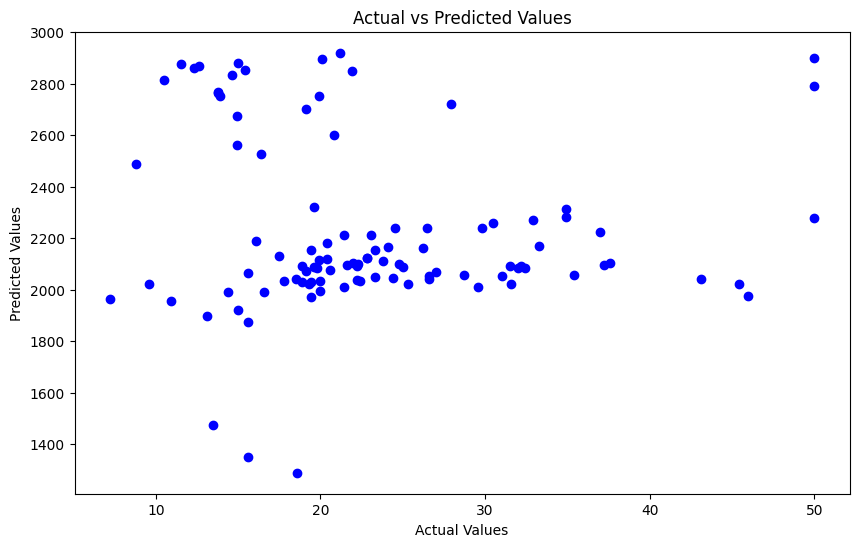

In [37]:
# Predict on test set
predictions = mlp_regressor_grid.best_estimator_.predict(X_test)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, predictions, c='blue')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()


## Ref

[https://coderzcolumn.com/tutorials/machine-learning/scikit-learn-sklearn-neural-network](https://coderzcolumn.com/tutorials/machine-learning/scikit-learn-sklearn-neural-network)